# **Load data**

In [1]:
import pandas as pd
import os

data_path = "/Users/arpad/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2"
df = pd.read_csv(os.path.join(data_path, 'shopping_trends_updated.csv'))
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# **Data preparation**

## data separation as X and Y

In [2]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['Frequency of Purchases'])

# Display the encoding mapping
print(list(zip(encoder.classes_, range(len(encoder.classes_)))))


[('Annually', 0), ('Bi-Weekly', 1), ('Every 3 Months', 2), ('Fortnightly', 3), ('Monthly', 4), ('Quarterly', 5), ('Weekly', 6)]


In [3]:
x = df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']].copy()
x['Avg_Purchase_Amount'] = x['Purchase Amount (USD)'] / (x['Previous Purchases'] + 1)
x

,Age,Purchase Amount (USD),Previous Purchases,Avg_Purchase_Amount
0,55,53,14,3.533333
1,19,64,2,21.333333
2,50,73,23,3.041667
3,21,90,49,1.800000
4,45,49,31,1.531250
...,...,...,...,...
3895,40,28,32,0.848485
3896,52,49,41,1.166667
3897,46,33,24,1.320000
3898,44,77,24,3.080000


## data splitting

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [5]:
x_train

,Age,Purchase Amount (USD),Previous Purchases,Avg_Purchase_Amount
945,38,38,8,4.222222
2466,32,84,37,2.210526
1915,51,74,44,1.644444
0,55,53,14,3.533333
3205,40,24,50,0.470588
...,...,...,...,...
1930,66,52,26,1.925926
79,38,96,43,2.181818
1859,54,26,29,0.866667
2840,40,47,41,1.119048


In [6]:
x_test

,Age,Purchase Amount (USD),Previous Purchases,Avg_Purchase_Amount
1726,57,28,45,0.608696
3339,20,99,35,2.750000
779,60,94,38,2.410256
366,64,36,37,0.947368
1048,30,77,19,3.850000
...,...,...,...,...
232,54,27,32,0.818182
3230,49,49,38,1.256410
2482,69,87,46,1.851064
2154,46,74,33,2.176471


# **Model building**

## logistic regression

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression with class weights and increased iterations
clf = LogisticRegression(random_state=100, class_weight="balanced", max_iter=500, solver="lbfgs")
clf.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=100)

In [8]:
# Make predictions
y_clf_train_pred = clf.predict(x_train_scaled)
y_clf_test_pred = clf.predict(x_test_scaled)

In [9]:
print(y_clf_train_pred, y_clf_test_pred)

[4 5 5 ... 6 5 3] [5 1 5 6 1 5 0 5 5 3 0 0 0 0 0 5 5 6 5 4 5 0 0 3 6 3 3 1 5 3 3 1 0 5 0 5 4
 1 4 3 3 0 0 0 5 4 5 1 1 1 3 5 1 5 6 0 6 3 4 5 1 5 5 5 5 3 4 5 0 4 5 6 3 3
 3 5 1 3 5 1 5 3 1 3 0 1 0 0 1 0 6 3 3 0 6 3 1 3 4 0 6 0 0 3 5 0 1 5 5 0 1
 5 6 4 6 0 1 6 5 0 6 5 5 3 1 4 0 4 5 3 5 3 0 6 4 0 3 3 5 5 5 4 0 3 3 3 0 3
 3 0 1 5 5 6 6 0 5 6 0 1 0 1 5 6 5 5 1 5 4 3 5 1 3 5 4 3 6 3 5 0 5 5 5 3 3
 6 5 1 3 3 0 1 1 5 3 3 0 4 0 3 3 6 4 5 3 5 5 3 3 0 1 5 6 3 0 0 1 5 1 5 4 0
 1 5 3 4 3 1 1 6 6 4 3 5 1 0 3 5 4 0 5 3 0 3 1 1 3 3 0 5 4 3 1 4 6 6 0 3 5
 3 1 5 5 5 5 0 6 4 0 0 0 5 5 6 4 3 6 5 4 5 1 4 3 3 5 3 5 5 3 0 5 4 5 6 5 1
 4 3 5 3 6 5 3 2 1 3 5 3 0 0 5 0 3 3 5 5 5 6 0 1 6 5 4 1 3 6 5 1 5 5 0 0 6
 6 5 5 5 4 5 3 1 5 3 3 4 5 5 0 0 4 1 3 4 4 1 4 5 5 1 3 3 1 0 6 3 5 6 3 5 5
 6 1 6 1 1 4 6 3 0 5 5 4 0 0 1 5 5 5 0 3 5 0 3 3 3 4 1 5 5 5 5 1 0 1 1 1 5
 3 0 5 3 5 5 4 1 1 1 0 0 4 3 0 5 0 3 6 0 5 1 4 1 0 3 3 4 3 3 4 0 3 5 3 5 5
 5 3 5 3 3 5 3 3 0 3 0 1 3 6 0 6 5 1 0 4 0 6 0 6 0 4 1 6 4 4 5 6 3 3 5 5 0
 0 3 3 

## performance on the training set


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features for better model performance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Use Logistic Regression with class weights or try Random Forest
# Uncomment the model you wish to use:

# Logistic Regression with balanced class weights
clf = LogisticRegression(random_state=100, class_weight="balanced", max_iter=500, solver="lbfgs")
clf.fit(x_train_scaled, y_train)

# Make predictions
y_clf_train_pred = clf.predict(x_train_scaled)
y_clf_test_pred = clf.predict(x_test_scaled)

# Evaluate on the training data
train_accuracy = accuracy_score(y_train, y_clf_train_pred)
train_precision = precision_score(y_train, y_clf_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_clf_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_clf_train_pred, average='weighted')

print("Training Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_clf_train_pred))
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")

# Evaluate on the test data
test_accuracy = accuracy_score(y_test, y_clf_test_pred)
test_precision = precision_score(y_test, y_clf_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_clf_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_clf_test_pred, average='weighted')

print("\nTesting Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_clf_test_pred))
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")

Training Performance:
Confusion Matrix:
 [[104  47   5  68  60 134  40]
 [ 88  53   4  77  52 121  35]
 [ 81  42   9  84  50 162  29]
 [ 65  51   5  86  54 133  34]
 [ 86  57   3  82  61 127  42]
 [ 86  43   3  87  50 156  38]
 [ 70  50   3  65  59 133  46]]
Accuracy: 0.16506410256410256
Precision: 0.18125633697575183
Recall: 0.16506410256410256
F1 Score: 0.14968119959615483

Testing Performance:
Confusion Matrix:
 [[21 20  0 25 10 28 10]
 [22 19  0 25 12 30  9]
 [21 20  1 30 13 28 14]
 [18 11  0 26 11 30 18]
 [11 13  0 14 13 42  2]
 [21  7  1 13 11 37 10]
 [17 17  2 26 13 30  8]]
Accuracy: 0.16025641025641027
Precision: 0.1711517646304844
Recall: 0.16025641025641027
F1 Score: 0.14040514187269437


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_clf = RandomForestClassifier(random_state=100, n_estimators=50, max_depth=10,class_weight='balanced')
rf_clf.fit(x_train, y_train)

# Predictions
y_rf_train_pred = rf_clf.predict(x_train)
y_rf_test_pred = rf_clf.predict(x_test)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_rf_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_rf_test_pred))
print("\nClassification Report (Testing):\n", classification_report(y_test, y_rf_test_pred))


Training Accuracy: 0.7708333333333334
Testing Accuracy: 0.16282051282051282

Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.18      0.17      0.17       114
           1       0.13      0.12      0.12       117
           2       0.21      0.19      0.20       127
           3       0.15      0.14      0.14       114
           4       0.16      0.24      0.19        95
           5       0.10      0.11      0.10       100
           6       0.22      0.18      0.20       113

    accuracy                           0.16       780
   macro avg       0.16      0.16      0.16       780
weighted avg       0.17      0.16      0.16       780



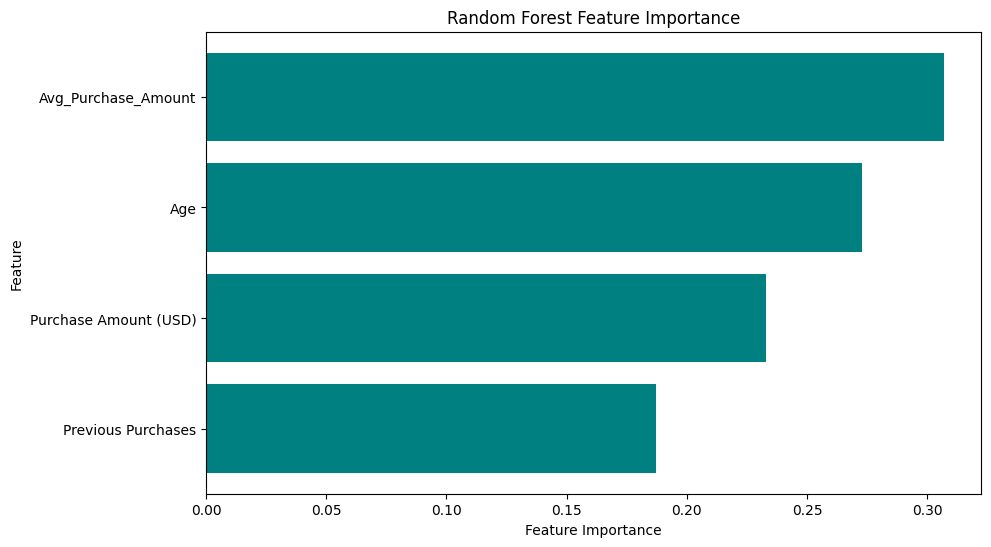

,Feature,Importance
0,Avg_Purchase_Amount,0.307031
1,Age,0.272941
2,Purchase Amount (USD),0.232734
3,Previous Purchases,0.187294


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame for feature importances
feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=x_train.columns, columns=['Importance'])

# Sort the feature importances DataFrame
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Reset index to make 'Feature' a column
feature_importances = feature_importances.reset_index().rename(columns={'index': 'Feature'})

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='teal')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Display the DataFrame
feature_importances
